In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from src.vae import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('dataset', train=True, download=True,
                                transform=torchvision.transforms.ToTensor(),
                                ), batch_size=batch_size, shuffle=True)

In [4]:
test_set = torchvision.datasets.MNIST('dataset', train=False, download=True,
                                transform=torchvision.transforms.ToTensor(),
                                )
test_size=len(test_set)
test_loader = torch.utils.data.DataLoader(
    test_set, batch_size= test_size, shuffle=True)

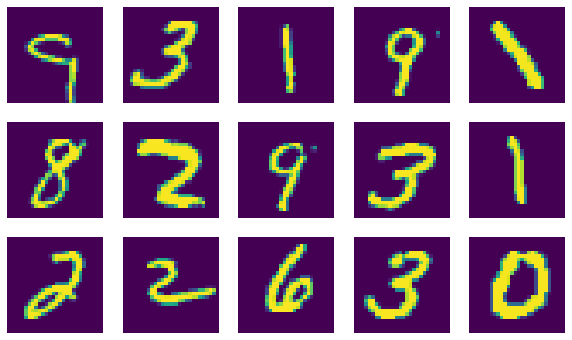

In [5]:
show_mnist(3,5,train_loader)

Epoch 0
loss = 21.89027976989746
Epoch 1
loss = 18.02040672302246
latent parameters


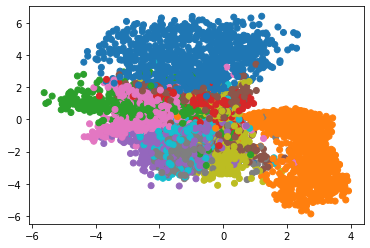

reconstruct images


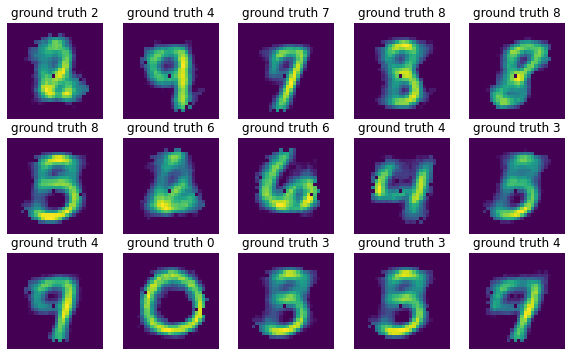

generate synthetic data


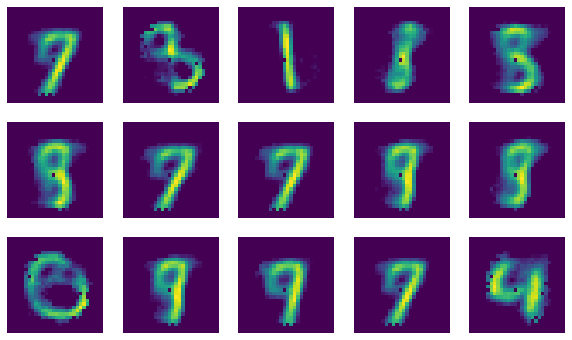

Epoch 2
loss = 17.09189224243164
Epoch 3
loss = 16.581926345825195
Epoch 4
loss = 16.207965850830078
Epoch 5
loss = 15.959824562072754
latent parameters


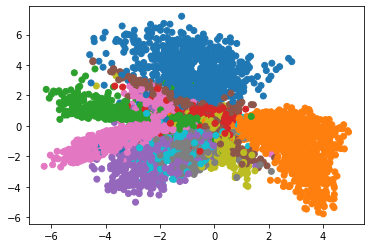

reconstruct images


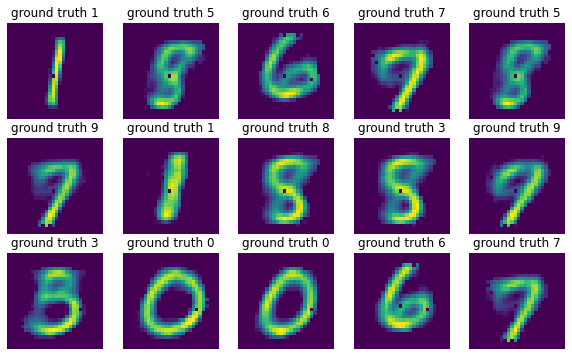

generate synthetic data


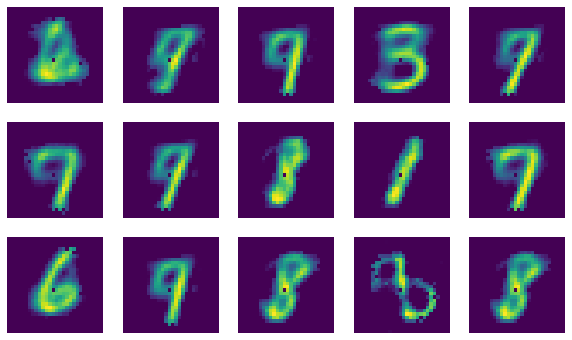

Epoch 6
loss = 15.764945030212402
Epoch 7
loss = 15.55166244506836
Epoch 8
loss = 15.238499641418457
Epoch 9
loss = 15.102091789245605
Epoch 10
loss = 14.972440719604492
Epoch 11
loss = 14.876045227050781
Epoch 12
loss = 14.800261497497559
Epoch 13
loss = 14.716619491577148
Epoch 14
loss = 14.649398803710938
Epoch 15
loss = 14.578866958618164
Epoch 16
loss = 14.53100872039795
Epoch 17
loss = 14.45346450805664
Epoch 18
loss = 14.411142349243164
Epoch 19
loss = 14.386868476867676
Epoch 20
loss = 14.305644989013672
Epoch 21
loss = 14.2474365234375
Epoch 22
loss = 14.232295036315918
Epoch 23
loss = 14.14898681640625
Epoch 24
loss = 14.182823181152344
Epoch 25
loss = 14.125165939331055
latent parameters


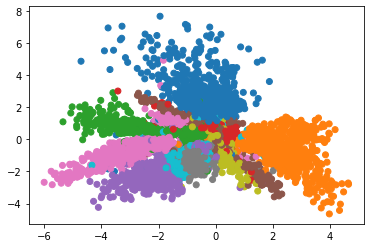

reconstruct images


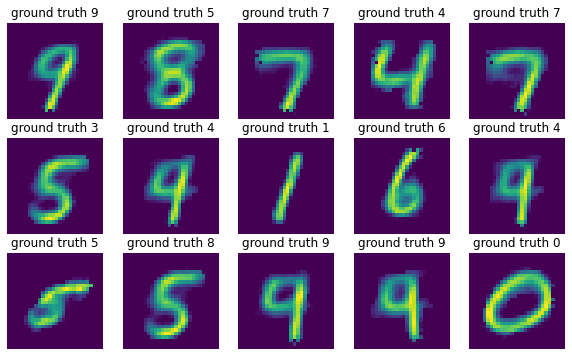

generate synthetic data


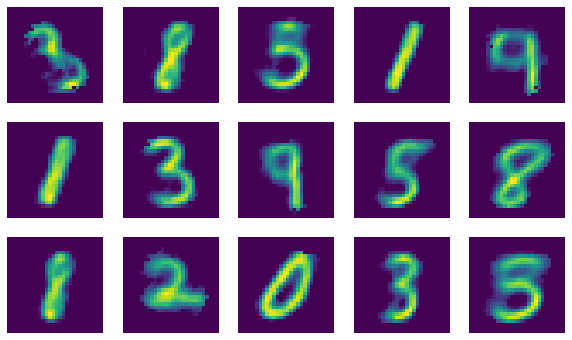

Epoch 26
loss = 14.101805686950684
Epoch 27
loss = 14.111498832702637
Epoch 28
loss = 14.045672416687012
Epoch 29
loss = 14.073269844055176
Epoch 30
loss = 14.0209321975708
Epoch 31
loss = 13.98001766204834
Epoch 32
loss = 13.934491157531738
Epoch 33
loss = 13.91346263885498
Epoch 34
loss = 13.892011642456055
Epoch 35
loss = 13.901957511901855
Epoch 36
loss = 13.88915729522705
Epoch 37
loss = 13.86034870147705
Epoch 38
loss = 13.796086311340332
Epoch 39
loss = 13.770061492919922
Epoch 40
loss = 13.744065284729004
Epoch 41
loss = 13.740498542785645
Epoch 42
loss = 13.73617172241211
Epoch 43
loss = 13.776985168457031
Epoch 44
loss = 13.763664245605469
Epoch 45
loss = 13.716707229614258
Epoch 46
loss = 13.700284957885742
Epoch 47
loss = 13.681246757507324
Epoch 48
loss = 13.671951293945312
Epoch 49
loss = 13.63364315032959
Epoch 50
loss = 13.617733001708984
latent parameters


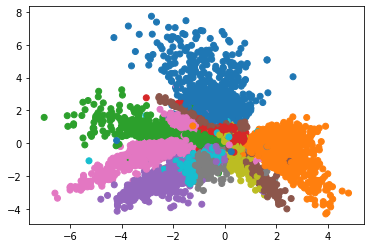

reconstruct images


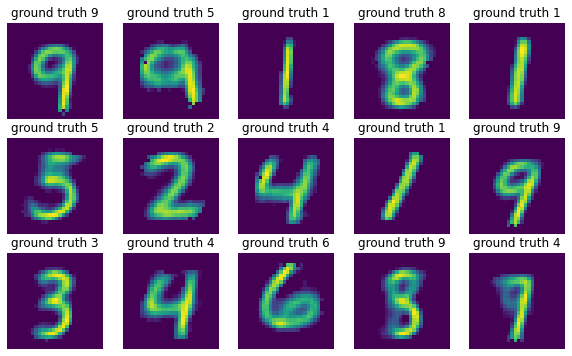

generate synthetic data


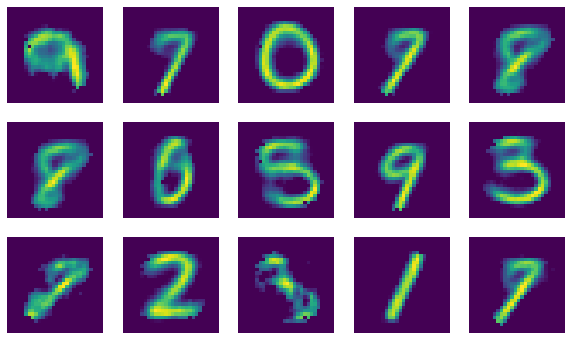

In [19]:
max_epochs = 51
show_step = 100
input_size = 28 * 28
output_size = 28 * 28
latent_dim = 2
en_hidden = 256
de_hidden = 256
gendata_size = 100
vae = VAE(en_hidden, latent_dim, de_hidden, input_size, output_size)
opt = torch.optim.Adam(vae.parameters(), lr=1e-3)
loss_train = []
loss_test = []
loss_epoch = 0
i = 0
for epoch in range(max_epochs):
    print("Epoch {0}".format(epoch))
    for batch in train_loader:
        x, y = batch
        x = x.view(x.shape[0], -1)
        opt.zero_grad()
        reconstruction, mu, sigma = vae.forward_elbo(x)
        loss = 1/batch_size*-vae.loss_function(x, reconstruction, mu, sigma).mean(-1)
        loss.backward()
        opt.step()
        loss_epoch += loss
        i += 1

    loss_epoch = loss_epoch / i
    print("loss = {0}".format(loss_epoch.item()))
    loss_train.append(loss_epoch)
    loss_epoch = 0
    i = 0
    for batch_test in test_loader:
         x_test, y_test = batch_test
         x_test = x_test.view(x_test.shape[0], -1)
         reconstruction_test, mu_test, sigma_test = vae.forward_elbo(x_test)
         loss = 1/test_size*-vae.loss_function(x_test, reconstruction_test, mu_test, sigma_test).mean(-1)
         loss_test.append(loss)
         if epoch == 1 or epoch == 5 or epoch == 25 or epoch == 50:
           print("latent parameters")
           show_latent_distribution(mu_test,y_test)
           print("reconstruct images")
           show_reconstruct_mnist(3, 5, reconstruction_test, y_test)
           print("generate synthetic data")
           gen_data = vae.gen_sample_data(gendata_size, latent_dim)
           show_generate_mnist(3, 5, gen_data)


    '''
    for i, batch_test in enumerate(test_loader):
        x_test, y_test = batch_test
        x_test = x_test.view(x_test.shape[0], -1)
        reconstruction_test, mu_test, logsigma_test = vae.forward_elbo(x_test)
        loss = -vae.loss_function(x_test, reconstruction_test, mu_test, logsigma_test).mean(-1)
        loss_test.append(loss)
    '''
    #vae.train()

Text(0.5, 1.0, 'epoch vs elbo')

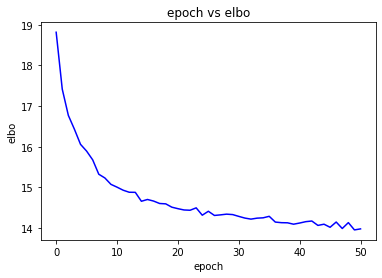

In [20]:
plt.plot(np.array(loss_test), 'b')
plt.xlabel("epoch")
plt.ylabel("elbo")
plt.title("epoch vs elbo")

Text(0.5, 1.0, 'epoch vs elbo')

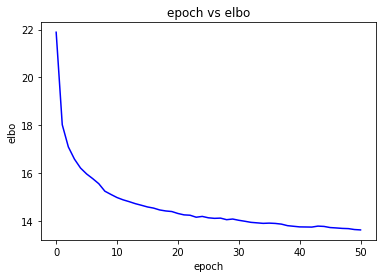

In [21]:
plt.plot(np.array(loss_train), 'b')
plt.xlabel("epoch")
plt.ylabel("elbo")
plt.title("epoch vs elbo")

Epoch 0
loss = 957.8948364257812
Epoch 1
latent parameters


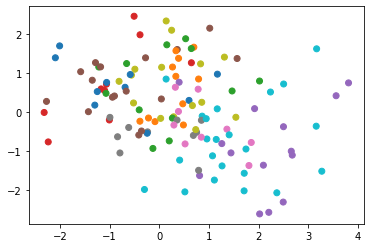

reconstruct images


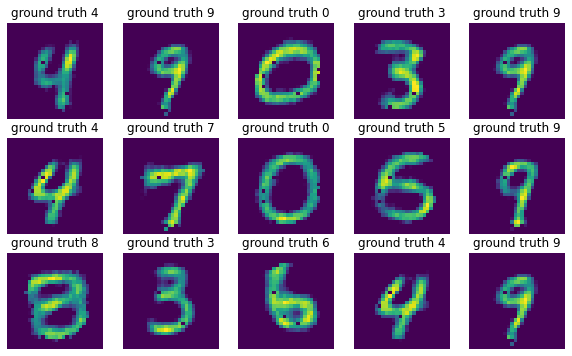

generate synthetic data


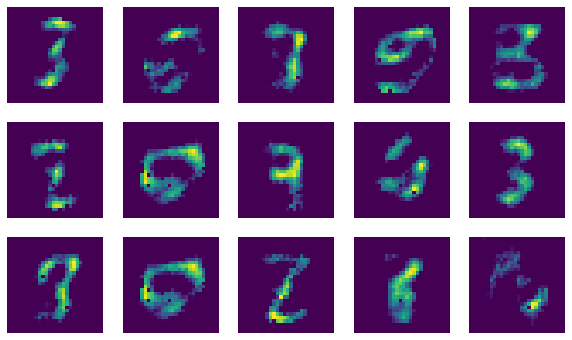

loss = 763.84814453125
Epoch 2
loss = 619.1349487304688
Epoch 3
loss = 612.47607421875
Epoch 4
loss = 610.4868774414062
Epoch 5
latent parameters


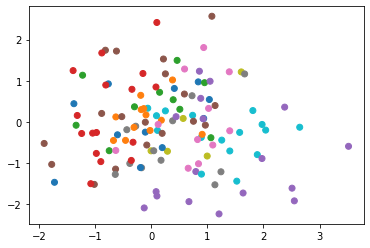

reconstruct images


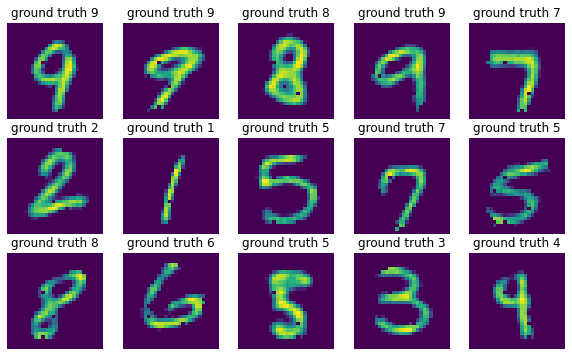

generate synthetic data


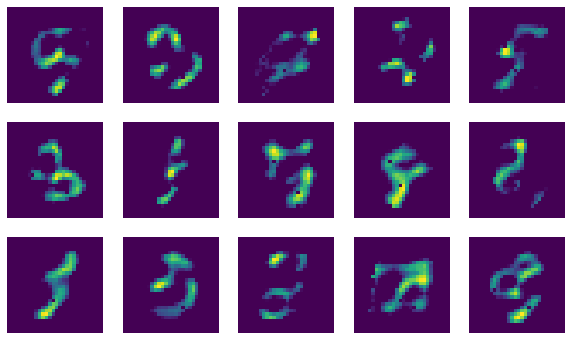

loss = 603.1286010742188
Epoch 6
loss = 512.5642700195312
Epoch 7
loss = 540.53955078125
Epoch 8
loss = 548.9071655273438
Epoch 9
loss = 517.12255859375
Epoch 10
latent parameters


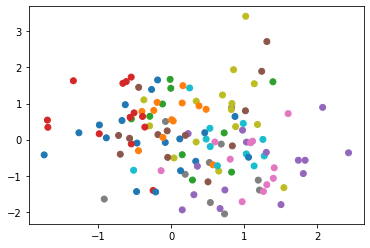

reconstruct images


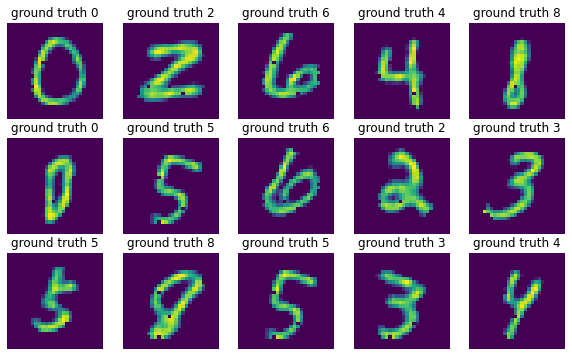

generate synthetic data


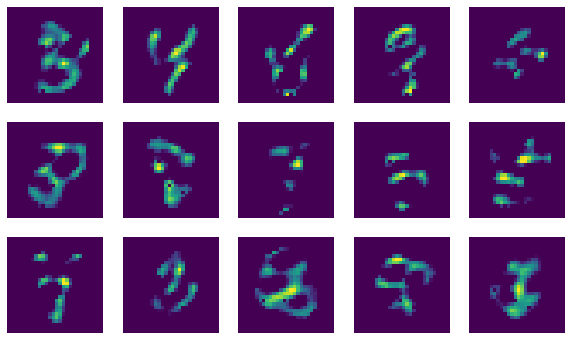

loss = 488.095947265625
Epoch 11
loss = 491.8695373535156
Epoch 12
loss = 522.7376098632812
Epoch 13
loss = 492.2598571777344
Epoch 14
loss = 497.5054626464844
Epoch 15
latent parameters


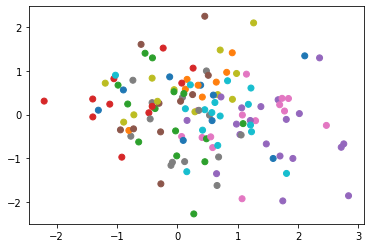

reconstruct images


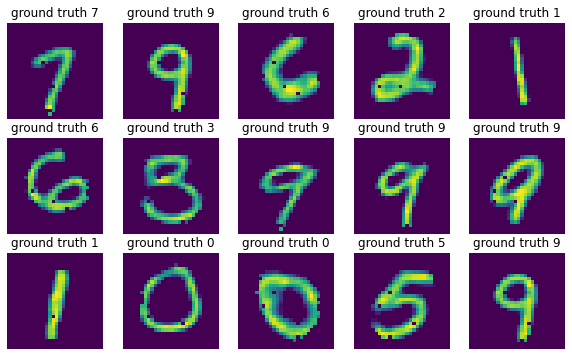

generate synthetic data


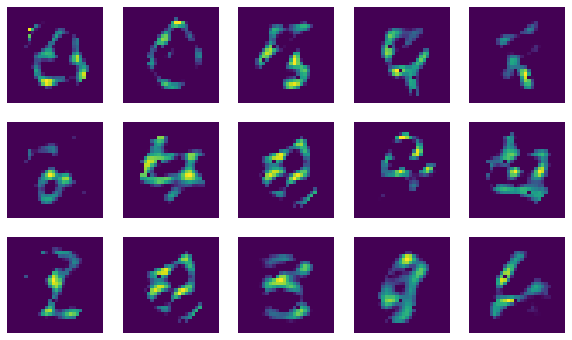

loss = 455.5318908691406


In [29]:
max_epochs = 51
show_step = 100
input_size = 28 * 28
output_size = 28 * 28
latent_dim = 32
en_hidden = 256
de_hidden = 256
gendata_size = 100
vae = VAE(en_hidden, latent_dim, de_hidden, input_size, output_size)
opt = torch.optim.Adam(vae.parameters(), lr=1e-3)
loss_train = []
loss_test = []
loss_epoch = 0
i = 0
for epoch in range(max_epochs):
    print("Epoch {0}".format(epoch))
    for batch in train_loader:
        x, y = batch
        x = x.view(x.shape[0], -1)
        opt.zero_grad()
        reconstruction, mu, sigma = vae.forward_elbo(x)
        loss = 1/batch_size*-vae.loss_function(x, reconstruction, mu, sigma).mean(-1)
        loss.backward()
        opt.step()
        loss_epoch += loss
        i += 1

    loss_epoch = loss_epoch / i
    print("loss = {0}".format(loss_epoch.item()))
    loss_train.append(loss_epoch)
    loss_epoch = 0
    i = 0
    for batch_test in test_loader:
         x_test, y_test = batch_test
         x_test = x_test.view(x_test.shape[0], -1)
         reconstruction_test, mu_test, sigma_test = vae.forward_elbo(x_test)
         loss = 1/test_size*-vae.loss_function(x_test, reconstruction_test, mu_test, sigma_test).mean(-1)
         loss_test.append(loss)
         if epoch == 1 or epoch == 5 or epoch == 25 or epoch == 50:
           print("latent parameters")
           show_latent_distribution(mu_test,y_test)
           print("reconstruct images")
           show_reconstruct_mnist(3, 5, reconstruction_test, y_test)
           print("generate synthetic data")
           gen_data = vae.gen_sample_data(gendata_size, latent_dim)
           show_generate_mnist(3, 5, gen_data)


    '''
    for i, batch_test in enumerate(test_loader):
        x_test, y_test = batch_test
        x_test = x_test.view(x_test.shape[0], -1)
        reconstruction_test, mu_test, logsigma_test = vae.forward_elbo(x_test)
        loss = -vae.loss_function(x_test, reconstruction_test, mu_test, logsigma_test).mean(-1)
        loss_test.append(loss)
    '''
    #vae.train()

In [ ]:
plt.plot(np.array(loss_test), 'b')
plt.xlabel("iteration")
plt.ylabel("elbo")
plt.title("iteration vs elbo")

In [ ]:
plt.plot(np.array(loss_train), 'b')
plt.xlabel("iteration")
plt.ylabel("elbo")
plt.title("iteration vs elbo")